In [1]:
# Dependencies and Setup
import pandas as pd
import warnings
import seaborn as sns
import matplotlib.pyplot as plt

warnings.filterwarnings('ignore')

# File to Load 
raw_data = "Resources/BankChurners.csv"

# display all rows from data frame
pd.set_option('display.max_rows', None)
# Read raw into Pandas DataFrames
raw_data_df = pd.read_csv(raw_data)

# View the data
raw_data_df.head()

CLIENTNUM     Attrition_Flag  Customer_Age Gender  Dependent_count  \
0  768805383  Existing Customer            45      M                3   
1  818770008  Existing Customer            49      F                5   
2  713982108  Existing Customer            51      M                3   
3  769911858  Existing Customer            40      F                4   
4  709106358  Existing Customer            40      M                3   

  Education_Level Marital_Status Income_Category Card_Category  \
0     High School        Married     $60K - $80K          Blue   
1        Graduate         Single  Less than $40K          Blue   
2        Graduate        Married    $80K - $120K          Blue   
3     High School        Unknown  Less than $40K          Blue   
4      Uneducated        Married     $60K - $80K          Blue   

   Months_on_book  ...  Credit_Limit  Total_Revolving_Bal  Avg_Open_To_Buy  \
0              39  ...       12691.0                  777          11914.0   
1              44  ...        8256.0                  864           7392.0   
2              36  ...        3418.0                    0           3418.0   
3              34  ...        3313.0                 2517            796.0   
4              21  ...        4716.0                    0           4716.0   

   Total_Amt_Chng_Q4_Q1  Total_Trans_Amt  Total_Trans_Ct  Total_Ct_Chng_Q4_Q1  \
0                 1.335             1144              42                1.625   
1                 1.541             1291              33                3.714   
2                 2.594             1887              20                2.333   
3                 1.405             1171              20                2.333   
4                 2.175              816              28                2.500   

   Avg_Utilization_Ratio  \
0                  0.061   
1                  0.105   
2                  0.000   
3                  0.760   
4                  0.000   

   Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1  \
0                                           0.000093                                                                                    
1                                           0.000057                                                                                    
2                                           0.000021                                                                                    
3                                           0.000134                                                                                    
4                                           0.000022                                                                                    

   Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2  
0                                            0.99991                                                                                   
1                                            0.99994                                                                                   
2                                            0.99998                                                                                   
3                                            0.99987                                                                                   
4                                            0.99998                                                                                   

[5 rows x 23 columns]

In [2]:
#Drop "Clientnum" and the "Naive_Bayes_Classifier" columns as they do not seem to have any effect on the data characteristics.
data_df = raw_data_df.drop(['CLIENTNUM','Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1',
                            'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2'], axis = 1)
# View the filtered dataframe.
data_df.head()

Attrition_Flag  Customer_Age Gender  Dependent_count Education_Level  \
0  Existing Customer            45      M                3     High School   
1  Existing Customer            49      F                5        Graduate   
2  Existing Customer            51      M                3        Graduate   
3  Existing Customer            40      F                4     High School   
4  Existing Customer            40      M                3      Uneducated   

  Marital_Status Income_Category Card_Category  Months_on_book  \
0        Married     $60K - $80K          Blue              39   
1         Single  Less than $40K          Blue              44   
2        Married    $80K - $120K          Blue              36   
3        Unknown  Less than $40K          Blue              34   
4        Married     $60K - $80K          Blue              21   

   Total_Relationship_Count  Months_Inactive_12_mon  Contacts_Count_12_mon  \
0                         5                       1                      3   
1                         6                       1                      2   
2                         4                       1                      0   
3                         3                       4                      1   
4                         5                       1                      0   

   Credit_Limit  Total_Revolving_Bal  Avg_Open_To_Buy  Total_Amt_Chng_Q4_Q1  \
0       12691.0                  777          11914.0                 1.335   
1        8256.0                  864           7392.0                 1.541   
2        3418.0                    0           3418.0                 2.594   
3        3313.0                 2517            796.0                 1.405   
4        4716.0                    0           4716.0                 2.175   

   Total_Trans_Amt  Total_Trans_Ct  Total_Ct_Chng_Q4_Q1  Avg_Utilization_Ratio  
0             1144              42                1.625                  0.061  
1             1291              33                3.714                  0.105  
2             1887              20                2.333                  0.000  
3             1171              20                2.333                  0.760  
4              816              28                2.500                  0.000

# STEP-1: in Data Exploration Word File
# STEP-2: in Tableau

# STEP-3: Bi-Variate Analysis

## 1. Correlation Between Continuous Variables

In [3]:
# Separate the columns with continous variables and view the dataframe.
data_continuous_df = data_df[['Customer_Age','Dependent_count','Months_on_book','Total_Relationship_Count',
                              'Months_Inactive_12_mon','Contacts_Count_12_mon','Credit_Limit','Total_Revolving_Bal',
                             'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1','Total_Trans_Amt','Total_Trans_Ct',
                             'Total_Ct_Chng_Q4_Q1','Avg_Utilization_Ratio']]
data_continuous_df.head()

Customer_Age  Dependent_count  Months_on_book  Total_Relationship_Count  \
0            45                3              39                         5   
1            49                5              44                         6   
2            51                3              36                         4   
3            40                4              34                         3   
4            40                3              21                         5   

   Months_Inactive_12_mon  Contacts_Count_12_mon  Credit_Limit  \
0                       1                      3       12691.0   
1                       1                      2        8256.0   
2                       1                      0        3418.0   
3                       4                      1        3313.0   
4                       1                      0        4716.0   

   Total_Revolving_Bal  Avg_Open_To_Buy  Total_Amt_Chng_Q4_Q1  \
0                  777          11914.0                 1.335   
1                  864           7392.0                 1.541   
2                    0           3418.0                 2.594   
3                 2517            796.0                 1.405   
4                    0           4716.0                 2.175   

   Total_Trans_Amt  Total_Trans_Ct  Total_Ct_Chng_Q4_Q1  Avg_Utilization_Ratio  
0             1144              42                1.625                  0.061  
1             1291              33                3.714                  0.105  
2             1887              20                2.333                  0.000  
3             1171              20                2.333                  0.760  
4              816              28                2.500                  0.000

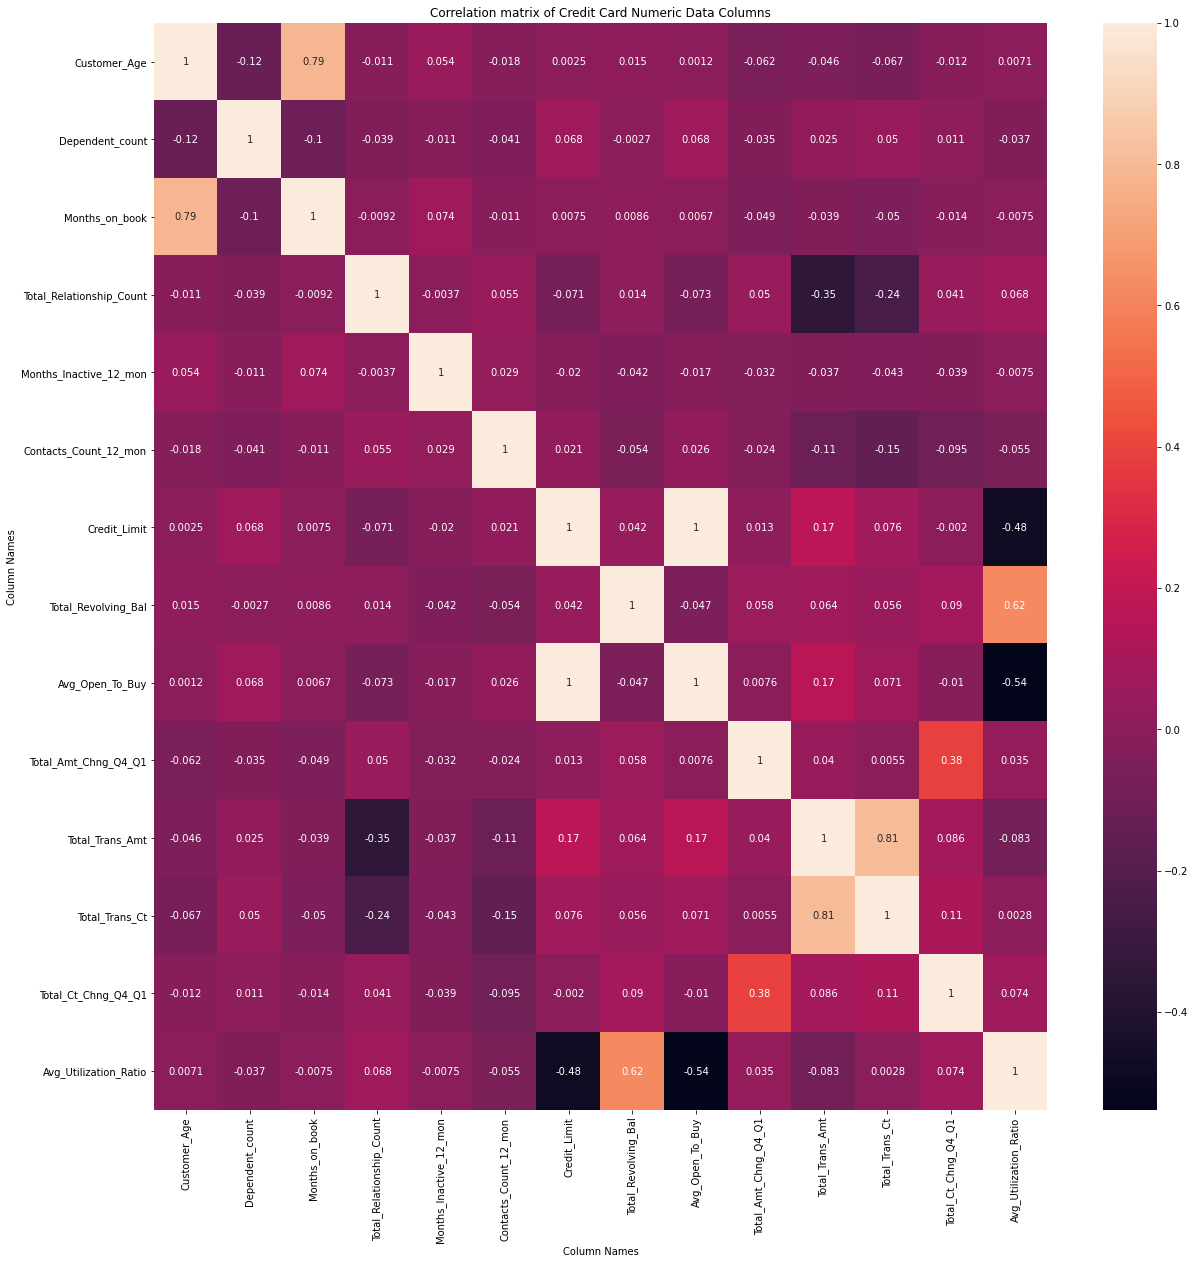

In [4]:
# Create perason's correlation matrix to evaluate relationship betweeen all continuous variables. 
correlation_mat = data_continuous_df.corr()
plt.figure(figsize=(20, 20))
sns.heatmap(correlation_mat, annot = True)
plt.title("Correlation matrix of Credit Card Numeric Data Columns")
plt.xlabel("Column Names")
plt.ylabel("Column Names")
plt.savefig('../Images/correlation_matrix.png')

In [5]:
# We will convert the given matrix into a one-dimensional Series of values
corr_pairs = correlation_mat.unstack()

# Sort these values using the sort_values() method of the Pandas Series
sorted_pairs = corr_pairs.sort_values(kind="quicksort")

# Filter strong correlation pairs (magnitude greater than 0.5)
strong_pairs = sorted_pairs[abs(sorted_pairs) > 0.5]
print(strong_pairs)

Avg_Open_To_Buy           Avg_Utilization_Ratio      -0.538808
Avg_Utilization_Ratio     Avg_Open_To_Buy            -0.538808
                          Total_Revolving_Bal         0.624022
Total_Revolving_Bal       Avg_Utilization_Ratio       0.624022
Months_on_book            Customer_Age                0.788912
Customer_Age              Months_on_book              0.788912
Total_Trans_Amt           Total_Trans_Ct              0.807192
Total_Trans_Ct            Total_Trans_Amt             0.807192
Avg_Open_To_Buy           Credit_Limit                0.995981
Credit_Limit              Avg_Open_To_Buy             0.995981
Customer_Age              Customer_Age                1.000000
Total_Trans_Ct            Total_Trans_Ct              1.000000
Total_Trans_Amt           Total_Trans_Amt             1.000000
Total_Amt_Chng_Q4_Q1      Total_Amt_Chng_Q4_Q1        1.000000
Avg_Open_To_Buy           Avg_Open_To_Buy             1.000000
Total_Revolving_Bal       Total_Revolving_Bal         1

### Observations: 
1. ‘Credit_Limit’ and ‘Avg_Open_To_buy’ have a perfect positive linear correlation of almost 1. Hence they will have the same value addition to our model. 
2. ‘Total_Trans_amt’ and ‘Total_Trans_ct’ have a strong positive linear correlation of 0.81. Hence 


## 2. Correlation Between Categorical Variables

In [6]:
# Separate the columns with categorical variables and view the dataframe.
categorical_data_df = data_df[['Attrition_Flag','Gender','Education_Level','Marital_Status','Income_Category',
                               'Card_Category']]
categorical_data_df.head()

Attrition_Flag Gender Education_Level Marital_Status Income_Category  \
0  Existing Customer      M     High School        Married     $60K - $80K   
1  Existing Customer      F        Graduate         Single  Less than $40K   
2  Existing Customer      M        Graduate        Married    $80K - $120K   
3  Existing Customer      F     High School        Unknown  Less than $40K   
4  Existing Customer      M      Uneducated        Married     $60K - $80K   

  Card_Category  
0          Blue  
1          Blue  
2          Blue  
3          Blue  
4          Blue

#### Comments: Here we have 5 category predictors and 1 category response. Attrition_Flag, the response column represents if customer left the bank or not.So we will see the relationship of all the other categorical variables with respect to this column.

In [7]:
# Before performig Ch-Square test we have to make sure data is label encoded
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
categorical_data_df['Attrition_Flag'] = label_encoder.fit_transform(categorical_data_df['Attrition_Flag']).copy()
categorical_data_df['Gender'] = label_encoder.fit_transform(categorical_data_df['Gender']).copy()
categorical_data_df['Education_Level'] = label_encoder.fit_transform(categorical_data_df['Education_Level']).copy()
categorical_data_df['Marital_Status'] = label_encoder.fit_transform(categorical_data_df['Marital_Status']).copy()
categorical_data_df['Income_Category'] = label_encoder.fit_transform(categorical_data_df['Income_Category']).copy()
categorical_data_df['Card_Category'] = label_encoder.fit_transform(categorical_data_df['Card_Category']).copy()
categorical_data_df.head()

Attrition_Flag  Gender  Education_Level  Marital_Status  Income_Category  \
0               1       1                3               1                2   
1               1       0                2               2                4   
2               1       1                2               1                3   
3               1       0                3               3                4   
4               1       1                5               1                2   

   Card_Category  
0              0  
1              0  
2              0  
3              0  
4              0

In [8]:
# Perform Chi-squared test to evaluate categorical variables.
from sklearn.feature_selection import chi2
X = categorical_data_df.drop('Attrition_Flag',axis=1)
y = categorical_data_df['Attrition_Flag']

chi_scores = chi2(X,y)
chi_scores

(array([7.4432227 , 0.33923111, 1.30275451, 2.47516959, 0.98612022]),
 array([0.00636758, 0.56027338, 0.25371069, 0.11565697, 0.32069248]))

#### Comments: Above, the first array represents chi square values and second array represnts p-values. Let us separate the p-values for further analysis

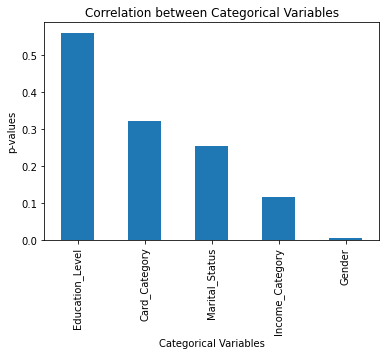

In [9]:
# Plot the p-values in a bar plot.
p_values = pd.Series(chi_scores[1],index = X.columns)
p_values.sort_values(ascending = False , inplace = True)
p_values.plot.bar()
plt.title("Correlation between Categorical Variables")
plt.xlabel("Categorical Variables")
plt.ylabel("p-values")
plt.savefig('../Images/chi-squareTest.png')

### Observations: Since the p-value for Gender < 0.05, there is a strong relationship between the Gender and whether a customer will leave the bank or not. For all the other variables, since the p-value >0.05, they are independant of Attrition_Flag.   

## 3. Correlation Between Categorical and Continuous Variables

In [10]:
# View the complete dataframe.
data_df.head()

Attrition_Flag  Customer_Age Gender  Dependent_count Education_Level  \
0  Existing Customer            45      M                3     High School   
1  Existing Customer            49      F                5        Graduate   
2  Existing Customer            51      M                3        Graduate   
3  Existing Customer            40      F                4     High School   
4  Existing Customer            40      M                3      Uneducated   

  Marital_Status Income_Category Card_Category  Months_on_book  \
0        Married     $60K - $80K          Blue              39   
1         Single  Less than $40K          Blue              44   
2        Married    $80K - $120K          Blue              36   
3        Unknown  Less than $40K          Blue              34   
4        Married     $60K - $80K          Blue              21   

   Total_Relationship_Count  Months_Inactive_12_mon  Contacts_Count_12_mon  \
0                         5                       1                      3   
1                         6                       1                      2   
2                         4                       1                      0   
3                         3                       4                      1   
4                         5                       1                      0   

   Credit_Limit  Total_Revolving_Bal  Avg_Open_To_Buy  Total_Amt_Chng_Q4_Q1  \
0       12691.0                  777          11914.0                 1.335   
1        8256.0                  864           7392.0                 1.541   
2        3418.0                    0           3418.0                 2.594   
3        3313.0                 2517            796.0                 1.405   
4        4716.0                    0           4716.0                 2.175   

   Total_Trans_Amt  Total_Trans_Ct  Total_Ct_Chng_Q4_Q1  Avg_Utilization_Ratio  
0             1144              42                1.625                  0.061  
1             1291              33                3.714                  0.105  
2             1887              20                2.333                  0.000  
3             1171              20                2.333                  0.760  
4              816              28                2.500                  0.000

In [11]:
# Create multi-index combinations for running ANNOVA teston variables.
index = pd.MultiIndex.from_product([['Customer_Age', 'Dependent_count','Months_on_book','Months_Inactive_12_mon',
                                    'Contacts_Count_12_mon','Credit_Limit', 'Total_Revolving_Bal', 'Avg_Open_To_Buy', 
                                     'Total_Amt_Chng_Q4_Q1','Total_Trans_Amt', 'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1',
                                     'Avg_Utilization_Ratio'],
                                    ['Attrition_Flag','Gender', 'Education_Level','Marital_Status','Income_Category',
                                     'Card_Category']],
                                   names=['cont', 'cat'])
index

MultiIndex([(          'Customer_Age',  'Attrition_Flag'),
            (          'Customer_Age',          'Gender'),
            (          'Customer_Age', 'Education_Level'),
            (          'Customer_Age',  'Marital_Status'),
            (          'Customer_Age', 'Income_Category'),
            (          'Customer_Age',   'Card_Category'),
            (       'Dependent_count',  'Attrition_Flag'),
            (       'Dependent_count',          'Gender'),
            (       'Dependent_count', 'Education_Level'),
            (       'Dependent_count',  'Marital_Status'),
            (       'Dependent_count', 'Income_Category'),
            (       'Dependent_count',   'Card_Category'),
            (        'Months_on_book',  'Attrition_Flag'),
            (        'Months_on_book',          'Gender'),
            (        'Months_on_book', 'Education_Level'),
            (        'Months_on_book',  'Marital_Status'),
            (        'Months_on_book', 'Income_Category'

In [12]:
# Running ANNOVA test to evaluate categorical Vs continuous variables.

import pandas as pd
import statsmodels.api as sm
import numpy as np
from statsmodels.formula.api import ols
tables = []
for cont_var,cat_var in index:
    model = ols('{} ~ {}'.format(cont_var,cat_var), data=data_df).fit()
    anova_table = sm.stats.anova_lm(model, typ=2)

    tables.append(anova_table)

df_anova = pd.concat(tables, keys=index, axis=0)
df_anova_styled = df_anova.style.background_gradient()
df_anova_styled

In [13]:
# Save the Annova test results as an image
import dataframe_image as dfi
dfi.export(df_anova_styled, '../Images/AnnovaTable.png', max_rows = -1)

# STEP-4 Missing Values treatement

In [15]:
# Check if there are any missing values in the final dataframe.
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Attrition_Flag            10127 non-null  object 
 1   Customer_Age              10127 non-null  int64  
 2   Gender                    10127 non-null  object 
 3   Dependent_count           10127 non-null  int64  
 4   Education_Level           10127 non-null  object 
 5   Marital_Status            10127 non-null  object 
 6   Income_Category           10127 non-null  object 
 7   Card_Category             10127 non-null  object 
 8   Months_on_book            10127 non-null  int64  
 9   Total_Relationship_Count  10127 non-null  int64  
 10  Months_Inactive_12_mon    10127 non-null  int64  
 11  Contacts_Count_12_mon     10127 non-null  int64  
 12  Credit_Limit              10127 non-null  float64
 13  Total_Revolving_Bal       10127 non-null  int64  
 14  Avg_Op

### Observation: As there are no missing values, there is no treatment to be done

# STEP-5: Outlier Treatement

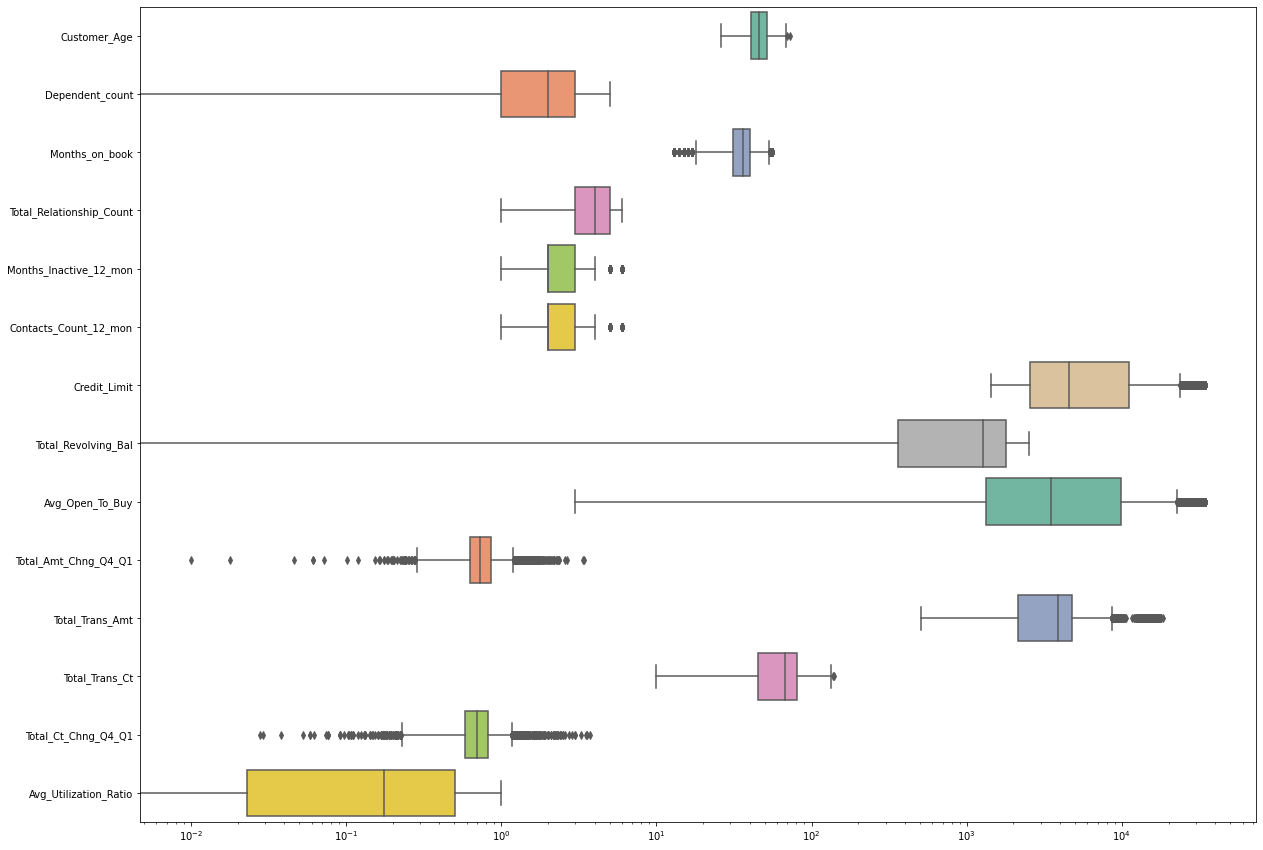

In [16]:
# UNIVARIATE: Box plot for each of the continous variables to view the outliers
plt.figure(figsize=(20, 15))
ax = sns.boxplot(data=data_df, orient="h", palette="Set2")
ax.set(xscale="log")
plt.savefig('../Images/Boxplot_Outliers.png')

### Observation: Many of the variables have outliers but appear to be natural outliers or characteristic of the dataset. We feel, removing these outliers will mean losing important information and hence we will go ahead retain them. 

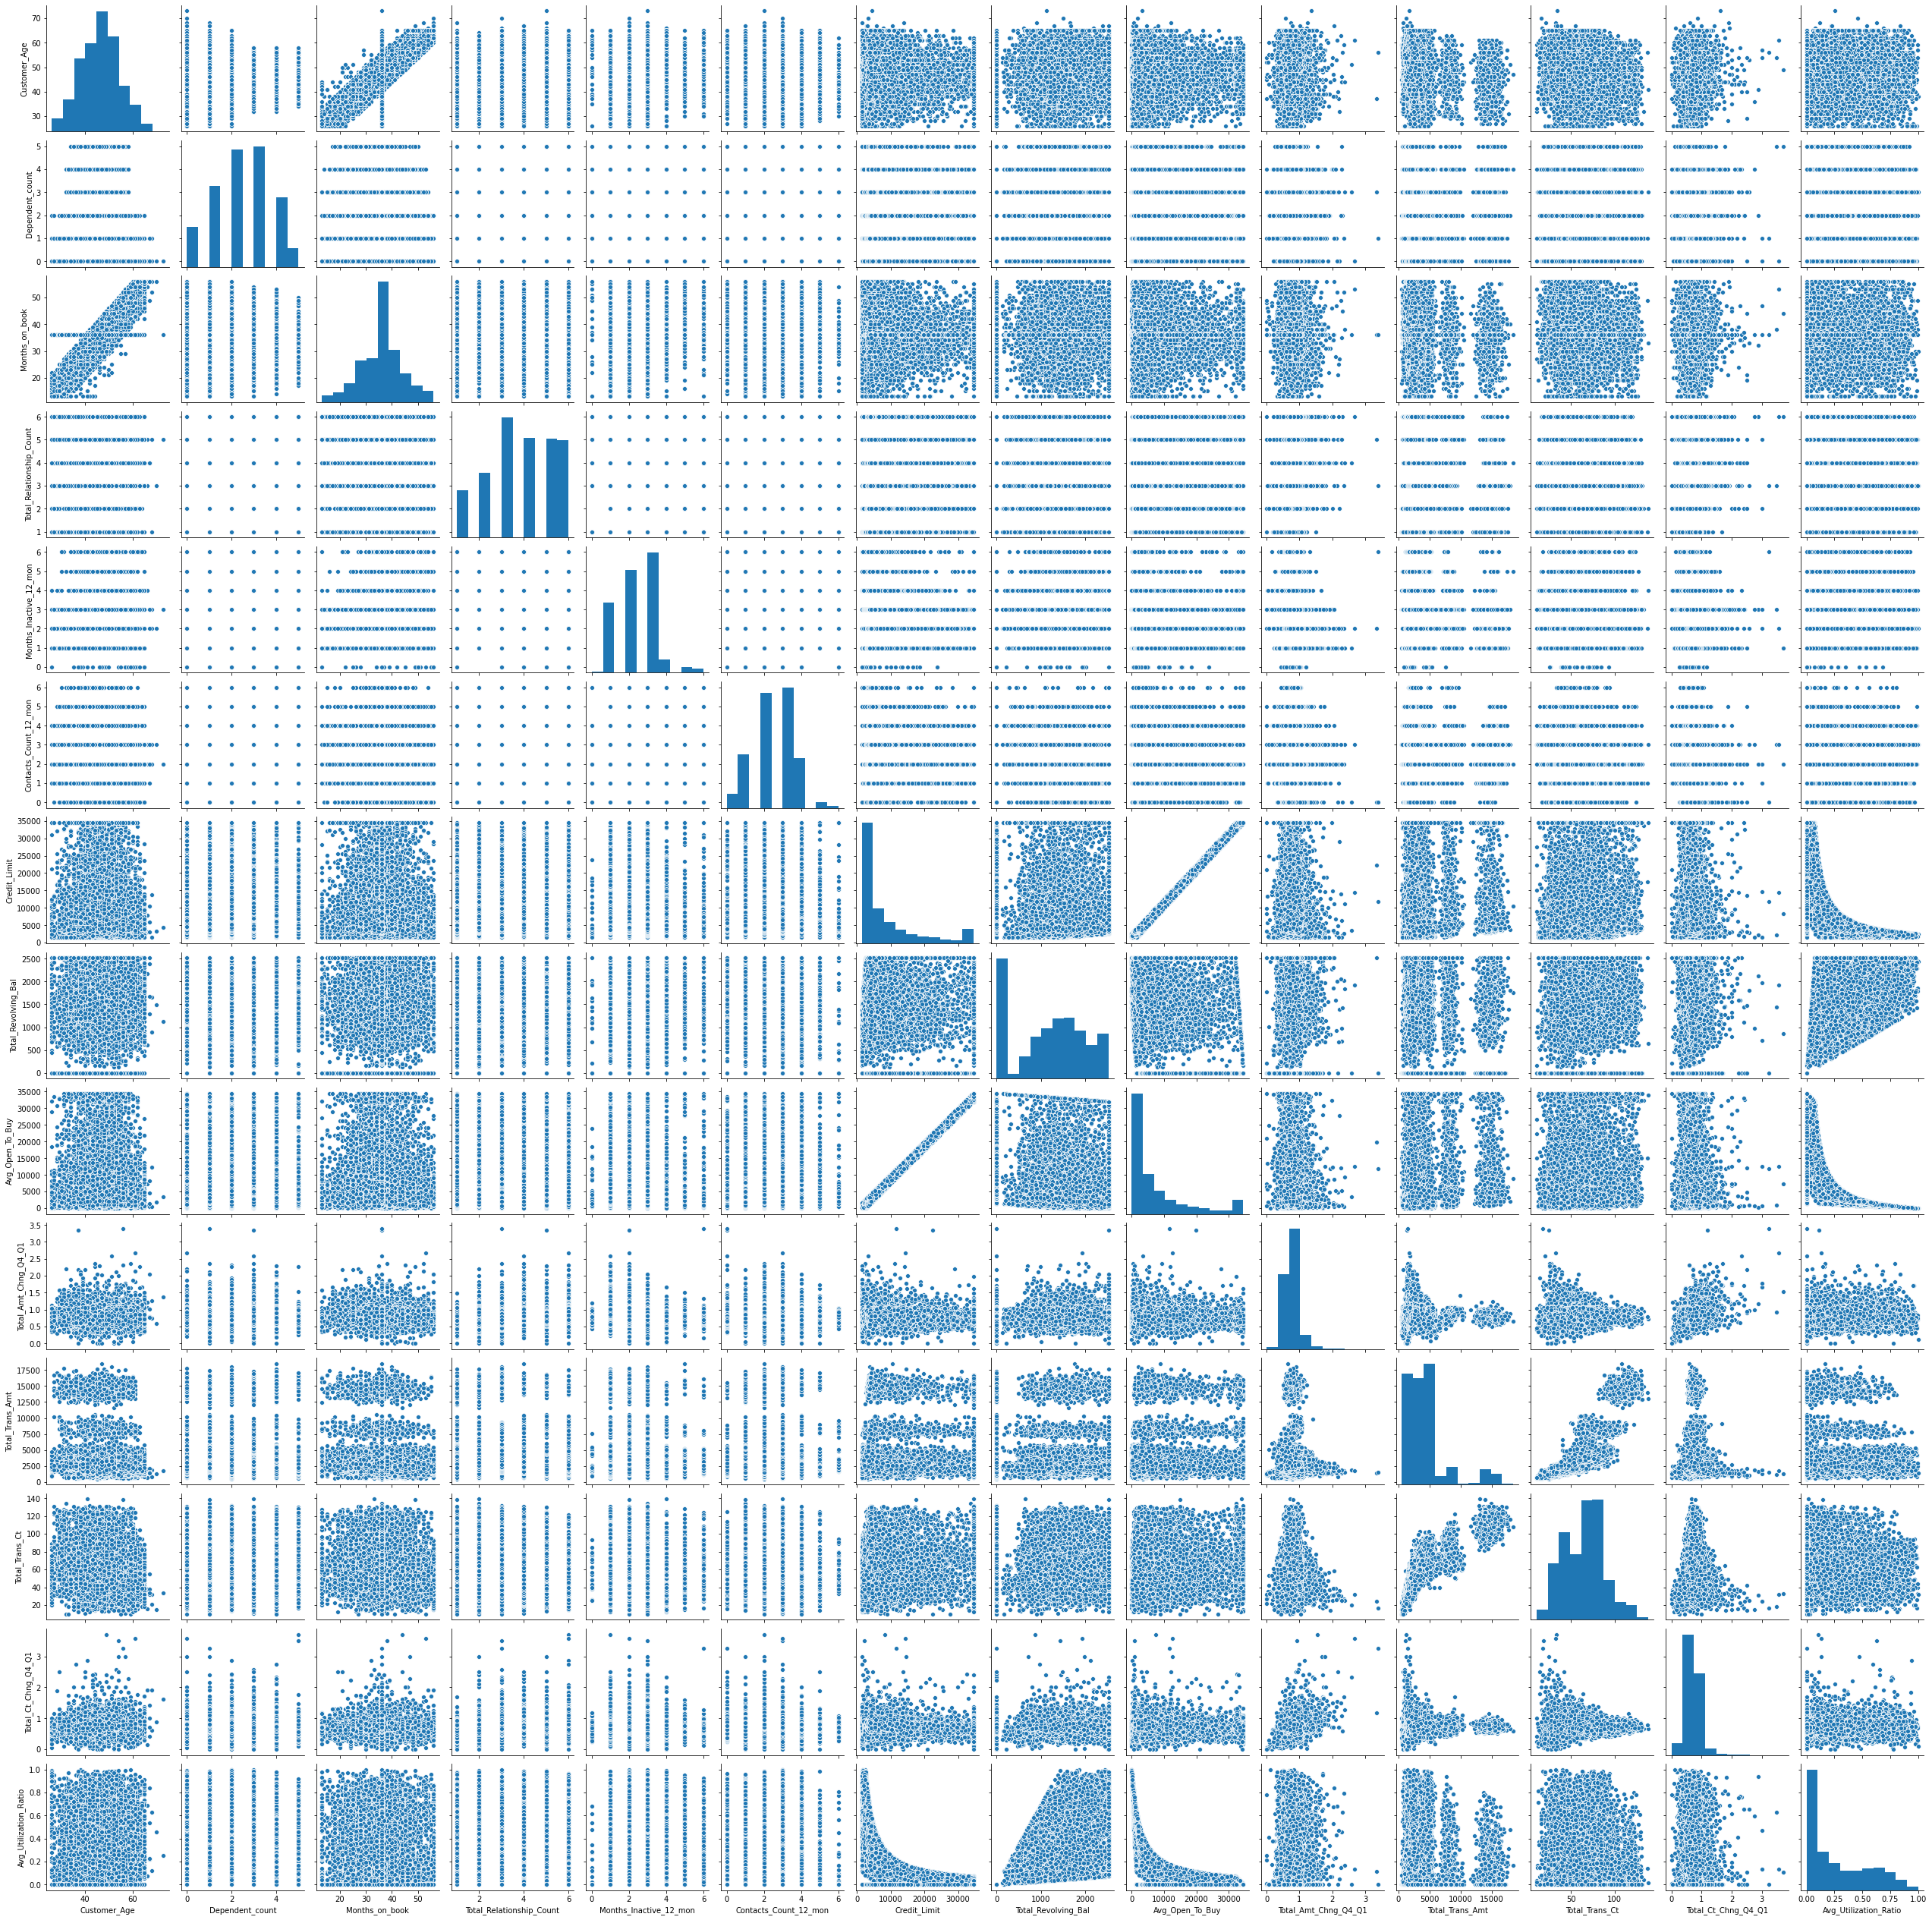

In [22]:
# MULTIVARIATE: Box plot for each of continous variables w.r.t some key categorical variables to gauge the outliers
# Seaborn visualization library
import seaborn as sns

# Create the default pairplot
sns.pairplot(data_df, palette='Dark2')
plt.savefig('../Images/Pairplots.png')

### Observation: Again when plotted against each other we see some outliers in sets of scatter plots, but we do not want to get rid of the data's characteristics and hence choose to not conduct any outlier treatment.

# FINAL DATA CLEAN-UP

In [18]:
# ‘Credit_Limit’ and ‘Avg_Open_To_buy’ have a perfect positive linear correlation of almost 1,keep only one column. 
# We decided to keep ‘Avg_Open_To_buy’

df_cleaned1 = data_df.drop(['Credit_Limit'], axis = 1)
df_cleaned1.head()

Attrition_Flag  Customer_Age Gender  Dependent_count Education_Level  \
0  Existing Customer            45      M                3     High School   
1  Existing Customer            49      F                5        Graduate   
2  Existing Customer            51      M                3        Graduate   
3  Existing Customer            40      F                4     High School   
4  Existing Customer            40      M                3      Uneducated   

  Marital_Status Income_Category Card_Category  Months_on_book  \
0        Married     $60K - $80K          Blue              39   
1         Single  Less than $40K          Blue              44   
2        Married    $80K - $120K          Blue              36   
3        Unknown  Less than $40K          Blue              34   
4        Married     $60K - $80K          Blue              21   

   Total_Relationship_Count  Months_Inactive_12_mon  Contacts_Count_12_mon  \
0                         5                       1                      3   
1                         6                       1                      2   
2                         4                       1                      0   
3                         3                       4                      1   
4                         5                       1                      0   

   Total_Revolving_Bal  Avg_Open_To_Buy  Total_Amt_Chng_Q4_Q1  \
0                  777          11914.0                 1.335   
1                  864           7392.0                 1.541   
2                    0           3418.0                 2.594   
3                 2517            796.0                 1.405   
4                    0           4716.0                 2.175   

   Total_Trans_Amt  Total_Trans_Ct  Total_Ct_Chng_Q4_Q1  Avg_Utilization_Ratio  
0             1144              42                1.625                  0.061  
1             1291              33                3.714                  0.105  
2             1887              20                2.333                  0.000  
3             1171              20                2.333                  0.760  
4              816              28                2.500                  0.000

In [19]:
# ‘Total_Trans_amt’ and ‘Total_Trans_ct’ have a strong positive linear correlation of 0.81. 
# We decided to combine both columns to get amount spent per transaction.
df_cleaned1['Amt_per_Trans'] = df_cleaned1['Total_Trans_Amt']/df_cleaned1['Total_Trans_Ct']
df_cleaned1.head()

Attrition_Flag  Customer_Age Gender  Dependent_count Education_Level  \
0  Existing Customer            45      M                3     High School   
1  Existing Customer            49      F                5        Graduate   
2  Existing Customer            51      M                3        Graduate   
3  Existing Customer            40      F                4     High School   
4  Existing Customer            40      M                3      Uneducated   

  Marital_Status Income_Category Card_Category  Months_on_book  \
0        Married     $60K - $80K          Blue              39   
1         Single  Less than $40K          Blue              44   
2        Married    $80K - $120K          Blue              36   
3        Unknown  Less than $40K          Blue              34   
4        Married     $60K - $80K          Blue              21   

   Total_Relationship_Count  Months_Inactive_12_mon  Contacts_Count_12_mon  \
0                         5                       1                      3   
1                         6                       1                      2   
2                         4                       1                      0   
3                         3                       4                      1   
4                         5                       1                      0   

   Total_Revolving_Bal  Avg_Open_To_Buy  Total_Amt_Chng_Q4_Q1  \
0                  777          11914.0                 1.335   
1                  864           7392.0                 1.541   
2                    0           3418.0                 2.594   
3                 2517            796.0                 1.405   
4                    0           4716.0                 2.175   

   Total_Trans_Amt  Total_Trans_Ct  Total_Ct_Chng_Q4_Q1  \
0             1144              42                1.625   
1             1291              33                3.714   
2             1887              20                2.333   
3             1171              20                2.333   
4              816              28                2.500   

   Avg_Utilization_Ratio  Amt_per_Trans  
0                  0.061      27.238095  
1                  0.105      39.121212  
2                  0.000      94.350000  
3                  0.760      58.550000  
4                  0.000      29.142857

In [20]:
# Export final cleaned dataframe for model development
df_cleaned1.to_csv('../Data/BankChurners_cleaned')